In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
import re

In [132]:
pwd

'/Users/mickey.poaro328/Desktop/projectB'

In [3]:
cd /Users/mickey.poaro328/Desktop/projectB/SDMprojectMaterial

In [4]:
cd /Users/mickey.poaro328/Desktop/projectB/SDMprojectMaterial/recipe

In [5]:
cd ..

In [6]:
from glob import glob

In [7]:
files = glob('recipe/*csv')
files

In [8]:
df = pd.read_csv("/Users/mickey.poaro328/Desktop/projectB/SDMprojectMaterial/recipe/recipe1998.csv")
print(df.head())

       pan  hot
year           
1998     0    0
1999     0    0
2000     1    8
2001    18    9
2002    24   33
2003    36  105
2004    49  129
2005    34  141
2006    85  170
2007   208  449
2008   255  613
2009   345  911
2010   451  854
2011   536  704
2012   740  834
2013  1192  832
2014   998  721
pan    4972
hot    6513
dtype: int64


Text(0.5, 1.0, 'count of each year')

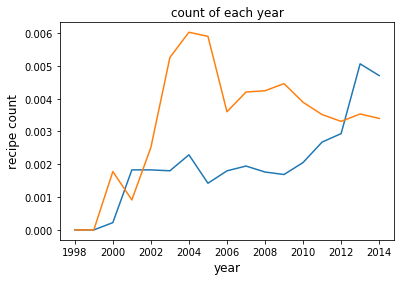

In [39]:

year = []
pan_num = []
hot_num = []
recipe_num = []
pan_per = []
hot_per = []
df1 = []
df2 = []
df3 = []
for i in range(1998,2015):
    year.append(i)
    pan_num.append(i)
    hot_num.append(i)
    df1.append(i)
    df2.append(i)
    df3.append(i)
    recipe_num.append(i)
    

for i in year:
    df = pd.read_csv(f"/Users/mickey.poaro328/Desktop/projectB/SDMprojectMaterial/recipe/recipe{i}.csv",names=["title"],usecols=[2])
    df.dropna(inplace=True)
    #パンケーキ、ホットケーキをそれぞれ抽出
    pan = df.query('title.str.contains("パンケーキ")',engine="python")
    pan2 = df.query('title.str.contains("ぱんけーき")',engine="python")
    #一つのデータにまとめる
    pan_num[i-1998]=pan.count()["title"]+pan2.count()["title"]
    hot = df.query('title.str.contains("ホットケーキ")',engine="python")
    hot2 = df.query('title.str.contains("ほっとけーき")',engine="python")
    #一つのデータにまとめる
    hot_num[i-1998]=hot.count()["title"]+hot2.count()["title"]
    #割合を計算するために全体のレシピ数を用意しておく
    recipe_num[i-1998] = df.count()["title"]
    #まずはレシピ数の比較用のデータ
    df1[i-1998]={'year':year[i-1998],'pan':pan_num[i-1998],'hot':hot_num[i-1998]}
    #次は割合を比較する用のデータ
    df2[i-1998]={'year':year[i-1998],'pan':(pan_num[i-1998]/recipe_num[i-1998]),'hot':(hot_num[i-1998]/recipe_num[i-1998])}
    #合わせた割合を求める用のデータ
    df3[i-1998]={'year':year[i-1998],'sum':(pan_num[i-1998]+hot_num[i-1998])/recipe_num[i-1998]}
    
#表を作る
data1 = pd.DataFrame(df1)
data1 = data1.set_index('year')
data2 = pd.DataFrame(df2)
data2 = data2.set_index('year')
data5 = pd.DataFrame(df3)
data5 = data5.set_index('year')
print(data1)

print(data1.sum())

#グラフを作る
%matplotlib inline
plt.plot(list(data1.index), data["pan"], label='pan')
plt.plot(list(data1.index), data["hot"], label='hot')
plt.xlabel("year",size=12)
plt.ylabel("recipe count",size=12)
plt.title("count of each year")

Text(0.5, 1.0, 'percentage of each year')

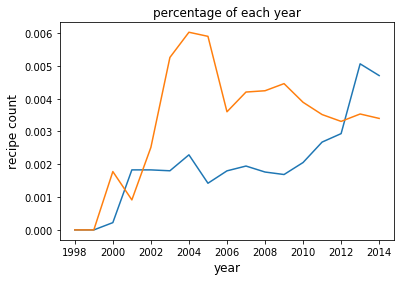

In [18]:
#割合のグラフを作る
%matplotlib inline
plt.plot(list(data2.index), data["pan"], label='pan')
plt.plot(list(data2.index), data["hot"], label='hot')
plt.xlabel("year",size=12)
plt.ylabel("recipe count",size=12)
plt.title("percentage of each year")

In [21]:
#相関関係を調べる
print(data2)

df_corr = data2.corr()
print(df_corr)

           pan       hot
year                    
1998  0.000000  0.000000
1999  0.000000  0.000000
2000  0.000222  0.001779
2001  0.001830  0.000915
2002  0.001830  0.002516
2003  0.001803  0.005257
2004  0.002289  0.006025
2005  0.001423  0.005900
2006  0.001800  0.003601
2007  0.001947  0.004203
2008  0.001765  0.004242
2009  0.001689  0.004459
2010  0.002054  0.003890
2011  0.002677  0.003516
2012  0.002935  0.003308
2013  0.005062  0.003533
2014  0.004704  0.003399
         pan      hot
pan  1.00000  0.40121
hot  0.40121  1.00000
<class 'pandas.core.frame.DataFrame'>


In [27]:
data3=data2.query('year>2008')

df_corr2 = data3.corr()
print(df_corr2)

data4=data2.query('year<2009')

df_corr3 = data4.corr()
print(df_corr3)

          pan       hot
pan  1.000000 -0.648116
hot -0.648116  1.000000
          pan       hot
pan  1.000000  0.728791
hot  0.728791  1.000000


           sum
year          
1998  0.000000
1999  0.000000
2000  0.002001
2001  0.002745
2002  0.004345
2003  0.007060
2004  0.008314
2005  0.007323
2006  0.005401
2007  0.006149
2008  0.006006
2009  0.006147
2010  0.005945
2011  0.006193
2012  0.006243
2013  0.008596
2014  0.008103


Text(0.5, 1.0, 'sum percentage of each year')

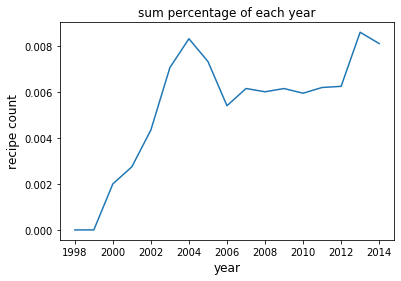

In [41]:
print(data5)

%matplotlib inline
plt.plot(list(data5.index), data5["sum"], label='sum')
plt.xlabel("year",size=12)
plt.ylabel("recipe count",size=12)
plt.title("sum percentage of each year")

/Users/mickey.poaro328/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


パンケーキの平均
6.019176423092451
ホットケーキの平均
6.720511241145673


Text(0.5, 1.0, 'pancake report')

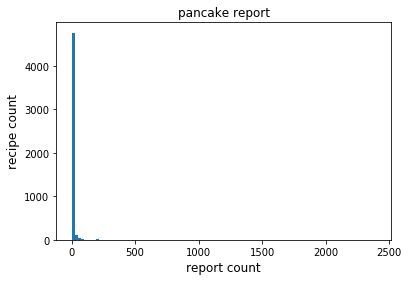

In [250]:
#レシピのデータとつくれぽを結びつける

#まずはレポートのデータを読み込む
report = pd.DataFrame(columns=["ID"])

for i in year:
    report_temp = pd.read_csv(f"/Users/mickey.poaro328/Desktop/projectB/SDMprojectMaterial/report/report{i}.csv",names=["ID"],usecols=[0])
    report = pd.concat([report, report_temp])

vc = report['ID'].value_counts()

count={'count'}
n1=[]
n2=[]
for i in year:
    #レシピ、つくれぽのデータから必要なデータを所得
    recipe = pd.read_csv(f"/Users/mickey.poaro328/Desktop/projectB/SDMprojectMaterial/recipe/recipe{i}.csv",names=["ID","title"],usecols=[0,2])
    recipe.fillna(0)
    #まずレシピのパンケーキ分のデータだけ先に抽出
    pan_recipe = recipe.query('title.str.contains("パンケーキ","ぱんけーき",na=False)',engine="python")
    df = pan_recipe.assign(report_number=0)
    
    for j in range(len(df)):
        try:
            df["report_number"].iloc[j] = vc[df["ID"].iloc[j]]
        except:
            continue
    
    n1 = np.append(n1, df.loc[:, "report_number"].values)

    #同様のことをホットケーキに対しても行う
    
    
    hot_recipe = recipe.query('title.str.contains("ホットケーキ","ほっとけーき",na=False)',engine="python")
    df_2 = hot_recipe.assign(report_number=0)
    
    for j in range(len(df)):
        try:
            df_2["report_number"].iloc[j] = vc[df_2["ID"].iloc[j]]
        except:
            continue
    
    n2 = np.append(n2, df_2.loc[:, "report_number"].values)

print("パンケーキの平均")
print(n1.mean())
print("ホットケーキの平均")
print(n2.mean())

plt.hist(n1, bins=100)
plt.xlabel("report count",size=12)
plt.ylabel("recipe count",size=12)
plt.title("pancake report")

Text(0.5, 1.0, 'pancake above 100')

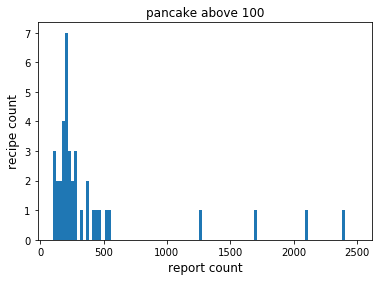

In [252]:
#パンケーキレシピ100以上のもの
number_above100 = []
for i in range(len(n1)):
    if n1[i] > 100:
        number_above100.append(n1[i])
plt.hist(number_above100, bins=100,range=(100, 2500))
plt.xlabel("report count",size=12)
plt.ylabel("recipe count",size=12)
plt.title("pancake above 100")

In [7]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(x, y)

NameError: name 'x' is not defined

Text(0.5, 1.0, 'avove 10')

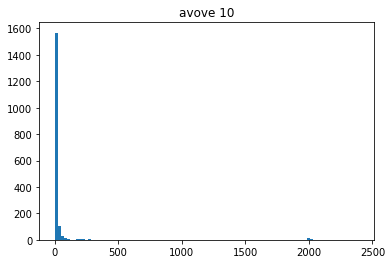

In [60]:
number_avove10 = []
for i in range(len(number)):
    if number[i]>10 & number[i]<100:
        number_avove10.append(number[i])
plt.hist(number_avove10, bins=100)
plt.title("avove 10")

Text(0.5, 1.0, 'hotcake above 100')

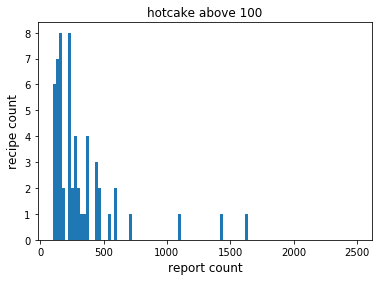

In [251]:
#ホットケーキレシピ100以上
number_2_above100 = []
for i in range(len(n2)):
    if n2[i] > 100 :
        number_2_above100.append(n2[i])
plt.hist(number_2_above100, bins=100, range=(100, 2500))
plt.xlabel("report count",size=12)
plt.ylabel("recipe count",size=12)
plt.title("hotcake above 100")

In [81]:
#パンケーキ、ホットケーキの材料の違いを比較する
#まず材料データとレシピデータを取得する
pan_recipe= pd.DataFrame(columns=["ID"])
hot_recipe = pd.DataFrame(columns=["ID"])
for i in year:
    recipe = pd.read_csv(f"/Users/mickey.poaro328/Desktop/projectB/SDMprojectMaterial/recipe/recipe{i}.csv",names=["ID","title"],usecols=[0,2])
    recipe.fillna(0)
    ingredient = pd.read_csv(f"/Users/mickey.poaro328/Desktop/projectB/SDMprojectMaterial/ingredient/ingredient{i}.csv",names=["ID","item"],usecols=[0,1])
    recipe.fillna(0)
    vc2 = ingredient['item'].value_counts()
    #レシピデータからパンケーキのデータを抽出
    p_recipe = recipe.query('title.str.contains("パンケーキ",na=False)',engine="python")
    p_recipe2 = recipe.query('title.str.contains("ぱんけーき",na=False)',engine="python")
    p_recipe3 = recipe.query('title.str.contains("pancake",na=False)',engine="python")
    pan_recipe = pd.concat([pan_recipe, p_recipe])
    pan_recipe = pd.concat([pan_recipe, p_recipe2])
    pan_recipe = pd.concat([pan_recipe, p_recipe3])
    print(len(pan_recipe))
    #レシピデータからホットケーキのデータを抽出
    h_recipe = recipe.query('title.str.contains("ホットケーキ",na=False)',engine="python")
    h_recipe2 = recipe.query('title.str.contains("ほっとけーき",na=False)',engine="python")
    h_recipe3 = recipe.query('title.str.contains("hot cake",na=False)',engine="python")
    hot_recipe = pd.concat([hot_recipe, h_recipe])
    hot_recipe = pd.concat([hot_recipe, h_recipe2])
    
print(len(pan_recipe))
print(len(hot_recipe))
    

0
0
1
19
43
79
128
162
248
456
711
1056
1508
2045
2786
3980
4979
4979
6513


In [98]:
pan_ID=pan_recipe.drop(["title"],axis=1)
df_pan = pd.merge(ingredient,pan_ID, on="ID", how="right")
print(df_pan)
print(len(ingredient), len(df_pan))

                                             ID       item
0      0019d0ab799508945c164b42d00c812e90219330    ＜パンケーキ＞
1      0019d0ab799508945c164b42d00c812e90219330        小麦粉
2      0019d0ab799508945c164b42d00c812e90219330  ベーキングパウダー
3      0019d0ab799508945c164b42d00c812e90219330         砂糖
4      0019d0ab799508945c164b42d00c812e90219330          塩
...                                         ...        ...
10819  360bb27a90428d7b97cf636b3545de7c1db4a5bf        NaN
10820  abf26ed2cd503347c24a24d3e487d6ccd6cb40e8        NaN
10821  55f23f044b571a322b4590511d49e95b3b165093        NaN
10822  61e45d19f35a0048bdb0e6ec15d17654eb5a5e6e        NaN
10823  2d3ec8f17e66541c45609fad1e32d635b3513994        NaN

[10824 rows x 2 columns]
1546742 10824


In [99]:
df_pan.drop("ID", axis=1, inplace=True)
s1=df_pan["item"].value_counts()[:59]
s1.name='pan item'
print(s1)

卵                486
牛乳               429
ホットケーキミックス       275
砂糖               246
ベーキングパウダー        243
薄力粉              139
塩                119
小麦粉              115
バター              114
バナナ              105
ヨーグルト             94
水                 83
サラダ油              82
豆乳                79
バニラエッセンス          60
パンケーキミックス         48
強力粉               45
たまご               45
メープルシロップ          43
生クリーム             42
米粉                41
油                 39
はちみつ              39
プレーンヨーグルト         35
レモン汁              33
溶かしバター            26
卵白                24
豆腐                22
卵黄                22
マヨネーズ             22
☆ベーキングパウダー        22
玉子                21
トッピング             21
☆砂糖               21
粉砂糖               20
BP                19
マーガリン             19
全粒粉               18
オリーブオイル           18
いちご               17
蜂蜜                17
ハチミツ              17
人参                16
じゃがいも             16
きび砂糖              16
片栗粉               16
ホイップクリーム          15
グラニュー糖       

In [100]:
hot_ID=hot_recipe.drop(["title"],axis=1)
df_hot = pd.merge(ingredient,hot_ID, on="ID", how="right")
print(df_hot.head())
print(len(ingredient), len(df_hot))

                                         ID        item
0  008ae77732a79ee72a84be85d51344eeff953f55  ホットケーキミックス
1  008ae77732a79ee72a84be85d51344eeff953f55          豆腐
2  008ae77732a79ee72a84be85d51344eeff953f55     豆乳もしくは水
3  00bbb5e6e0d75b8a1a940e1f681ed98684862f38  ホットケーキミックス
4  00bbb5e6e0d75b8a1a940e1f681ed98684862f38           卵
1546742 9963


In [101]:
df_hot.drop("ID", axis=1, inplace=True)
s2=df_hot["item"].value_counts()[:59]
s2.name='hot_item'
print(s2)

ホットケーキミックス     441
卵              383
牛乳             382
砂糖             202
ベーキングパウダー       99
バター             97
サラダ油            74
薄力粉             66
塩               55
水               41
バナナ             40
小麦粉             37
油               33
たまご             30
ヨーグルト           28
バニラエッセンス        27
豆乳              26
マヨネーズ           24
玉子              21
生クリーム           20
オリーブオイル         19
はちみつ            18
溶かしバター          18
マーガリン           17
メープルシロップ        16
豆腐              16
板チョコ            14
HM              13
ホットケーキ          13
☆牛乳             12
卵白              12
レモン汁            12
ケチャップ           11
グラニュー糖          11
スライスチーズ         11
☆卵              10
ベーコン            10
卵(M)            10
強力粉             10
卵黄              10
絹ごし豆腐           10
★牛乳             10
おから              9
ココア              9
チョコチップ           9
ハチミツ             9
ハム               9
揚げ油              9
片栗粉              9
☆ホットケーキミックス      9
玉ねぎ              9
りんご              8
粉砂糖         

In [108]:
#材料の二つのものを連結させ相関係数をえる
s3=pd.concat([s1, s2], axis=1)
s4=s3.fillna(0)
s5 = s4.corr()
print(s5)

          pan item  hot_item
pan item  1.000000  0.915471
hot_item  0.915471  1.000000


Text(0.5, 1.0, 'above 100')

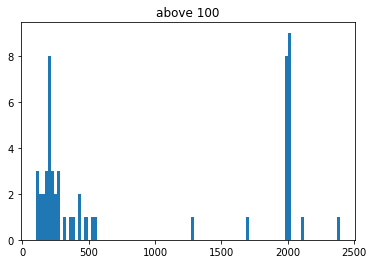

In [47]:
number_above100 = []
for i in range(len(number)):
    if number[i] > 100:
        number_above100.append(number[i])
plt.hist(number_above100, bins=100)
plt.title("above 100")